<H1>Исследование данных продаж игр для интернет-магазина «Стримчик»</H1>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Содержание
- 1. [Предобработка данных](#title1)
- 2. [Анализ данных](#title2)
-    [Промежуточные итоги](#title3)
-    [Промежуточные итоги корреляции](#title4)
-    [Распределение продаж по жанрам](#title5)
-    [Портрет пользователя](#title6)
-    [Распределение продаж по возрастному рейтингу](#title7)
- 3. [Проверка гипотез](#title8)
- 4. [Вывод](#title9)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## <a id="title1">1. Предобработка данных</a>

<font color="#fa8e47" size=5>
Прочитаем файл и получим общую информацию о таблице

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Датасет содержит 11 колонок 16715 строк, и является статистикой продаж игр по разным регионам за период

In [5]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
# Приведем названия колонок к нижнему регистру
df.columns = df.columns.str.lower()

In [7]:
# Уточним количество пропусков в данных
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<font color="#fa8e47" size=5>
Поменяем типы данных и заполним пропуски где это целесообразно

In [8]:
col = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'user_score', 'critic_score']
for i in col:
    df[i] = pd.to_numeric(df[i], errors='coerce', downcast='float')
# Понизим точность чисел с плавающей точкой, где это возможно
# Также обработаем значения 'tbd' в колонке с рейтингом, что значит 'уточняется', заменим его значением NaN

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float32
 5   eu_sales         16715 non-null  float32
 6   jp_sales         16715 non-null  float32
 7   other_sales      16715 non-null  float32
 8   critic_score     8137 non-null   float32
 9   user_score       7590 non-null   float32
 10  rating           9949 non-null   object 
dtypes: float32(6), float64(1), object(4)
memory usage: 1.0+ MB


In [10]:
df['year_of_release'].isna().sum()

269

In [11]:
# пропуски в дате релиза удалим и преобразуем в целочисленный тип
df.dropna(subset='year_of_release', inplace=True)
df['year_of_release'] = df['year_of_release'].astype('int')

In [12]:
# пропуски в рейтинге заполним значением "RP" т.е. рейтинг уточняется
df['rating'] = df['rating'].fillna('RP')

In [13]:
df.duplicated().sum()

0

In [14]:
df['name'].value_counts()

name
Need for Speed: Most Wanted               12
LEGO Marvel Super Heroes                   9
Ratatouille                                9
FIFA 14                                    9
Terraria                                   8
                                          ..
Loving Life with Hello Kitty & Friends     1
Scrabble (Others sales)                    1
Viva Pinata: Party Animals                 1
Sands of Destruction                       1
Haitaka no Psychedelica                    1
Name: count, Length: 11426, dtype: int64

In [15]:
# Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец
df['sales_total'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [16]:
df['rating'].value_counts()

rating
RP      6679
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
Name: count, dtype: int64

Пропуски в годе релиза по возможности заполняем известными датами релиза тех же игр на других платформах, пропуски в оценках критиков и пользователей оставим без изменений так как заполнение их каким то средним или медианной исказит результат. Пропуски в рейтинге предположительно означают что рейтинг не присвоен поэтому заполним их значениями RP (Rating Pending). Пропуски возможны как по техническим причинам, так и по причинам отсутствия данных(например данных по пользовательским оценкам)

## <a id="title2">2. Анализ данных</a>

In [17]:
df['year_of_release'].value_counts()

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: count, dtype: int64

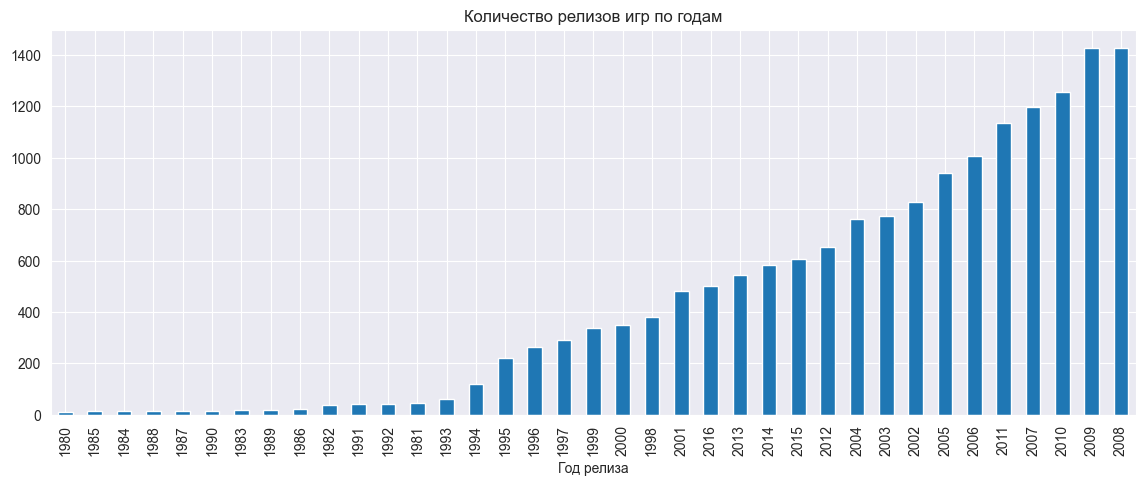

In [18]:
df['year_of_release'].value_counts(ascending=True).plot(kind='bar', figsize=(14,5))
plt.xlabel('Год релиза')
plt.title('Количество релизов игр по годам')
plt.show()

* Для анализа выберем периоды с 2012 года в связи с актуальностью текущих платформ например PS4 появилась в 2012 году

In [19]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

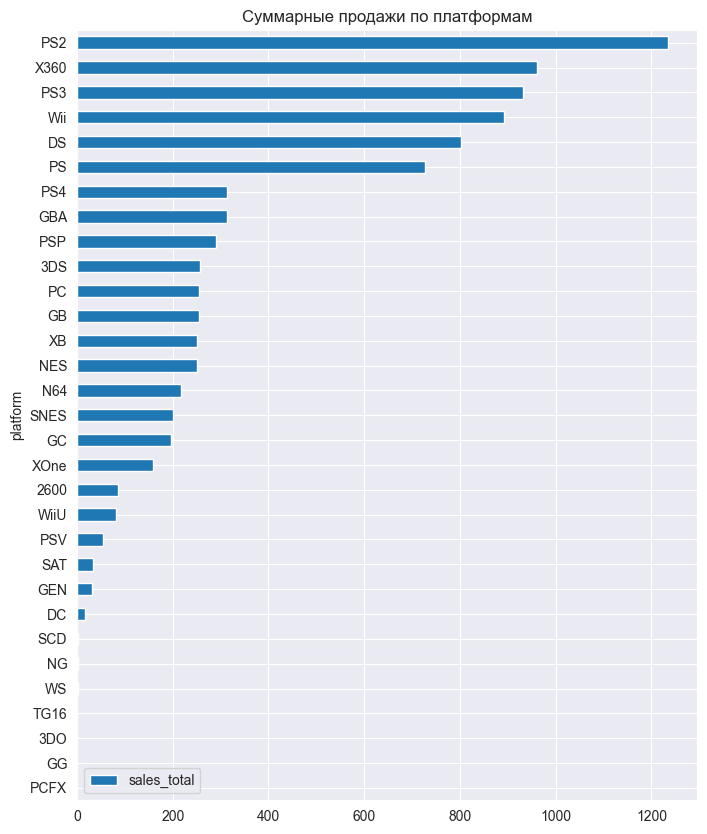

In [20]:
# Посмотрим на суммарные продажи по всем платформам
df.groupby('platform')['sales_total'].sum().sort_values().plot(x='platform', kind='barh', legend=True, figsize=(8,10))
plt.title('Суммарные продажи по платформам')
plt.show()

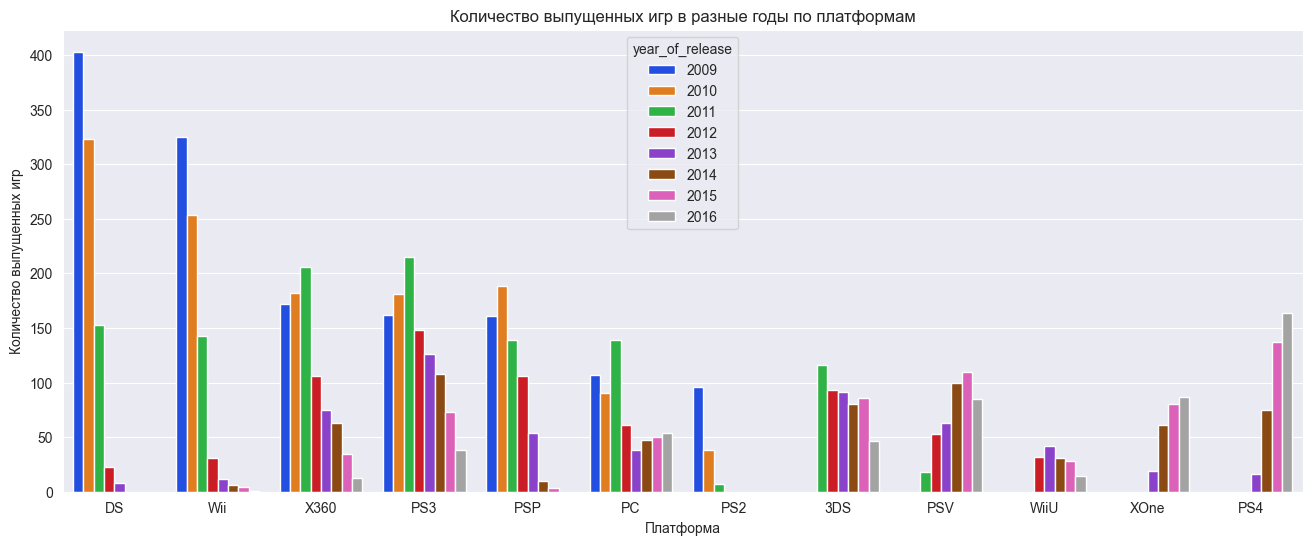

In [21]:
# Посмотрим количество выпущенных игр в разные годы по платформам
df_sort = df.query('year_of_release > 2008').groupby('year_of_release')['platform'].value_counts()
df_sort = df_sort.to_frame(name='count').reset_index()

ax = plt.subplots(figsize=(16, 6))
ax = sns.barplot(x='platform',
                 y='count',
                 hue="year_of_release",
                 data=df_sort,
                 palette='bright')

ax.set_title('Количество выпущенных игр в разные годы по платформам')
ax.set(xlabel='Платформа', ylabel='Количество выпущенных игр');

* Можно сделать вывод, что количество релизов игр для актуальных платформ таких как PS4, XOne, PSV и PС растут последние несколько лет,
а для устаревших платформ таких PSP, X360 и PS3 снижается
* Отдельно можно отметить платформу 3DS, где количество релизов остается стабильным последние годы

In [22]:
df.query('year_of_release > 2012').groupby('platform')['sales_total'].sum()

platform
3DS     143.250000
DS        1.540000
PC       39.430000
PS3     181.429993
PS4     314.140015
PSP       3.500000
PSV      32.989998
Wii      13.660000
WiiU     64.629997
X360    136.800003
XOne    159.320007
Name: sales_total, dtype: float32

In [23]:
df.groupby(['platform', 'year_of_release'])['sales_total'].sum()

platform  year_of_release
2600      1980               11.380000
          1981               35.680000
          1982               28.879999
          1983                5.840000
          1984                0.270000
                               ...    
XB        2008                0.180000
XOne      2013               18.960001
          2014               54.070000
          2015               60.139999
          2016               26.150000
Name: sales_total, Length: 238, dtype: float32

In [24]:
df.query('year_of_release > 0').pivot_table(index='year_of_release',
                                               columns='platform',
                                               values='sales_total',
                                               aggfunc=np.sum,
                                               fill_value=0,
                                               margins=True)

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne,All
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.380000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,11.380000
1981,35.680000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,35.680000
1982,28.879999,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,28.879999
1983,5.840000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,16.799999
1984,0.270000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,50.349998
1985,0.450000,0.00,0.000000,0.00,0.020000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,53.950001
1986,0.670000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,37.079998
1987,1.940000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,21.700001
1988,0.740000,0.00,0.000000,0.00,0.000000,1.430000,0.000000,0.000000,0.000000,0.00,...,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,47.209999


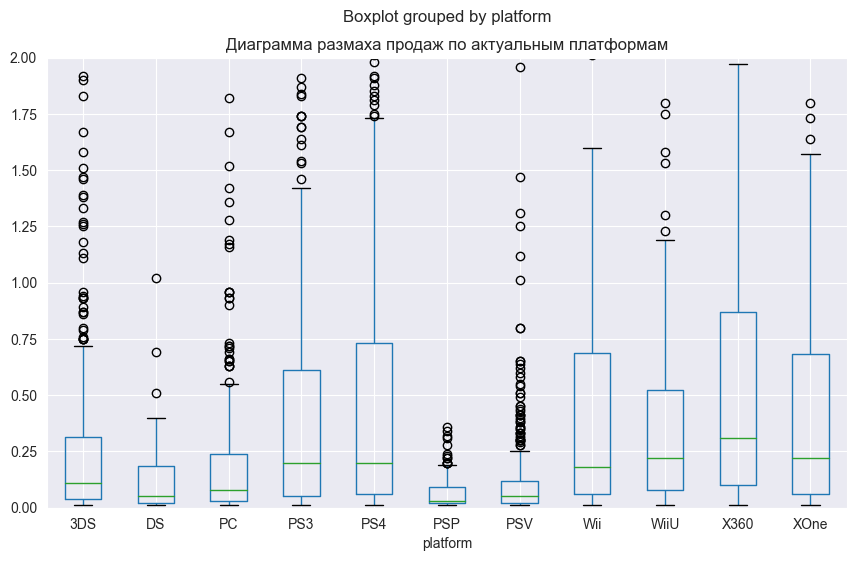

In [63]:
df.query('year_of_release >= 2012').boxplot(column='sales_total', by='platform', figsize=(10,6))
plt.title('Диаграмма размаха продаж по актуальным платформам')
plt.ylim(0,2)
plt.show()

* Диаграмма размаха по платформам показывает очень большое количество выбросов, что говорит об очень большом разбросе по продажам в зависимости от конкретной игры

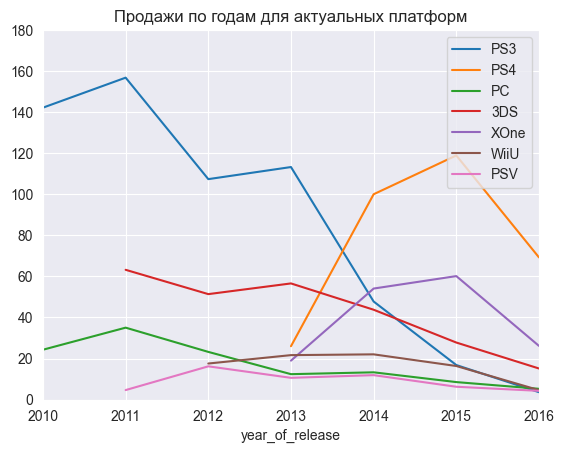

In [26]:
# Построим графики продаж по годам для актуальных платформ за актуальные периоды

df.loc[(df['platform'] == 'PS3') & (df['year_of_release'] > 0)].groupby(
    'year_of_release')['sales_total'].sum().plot(label='PS3')

df.loc[(df['platform'] == 'PS4') & (df['year_of_release'] > 0)].groupby(
    'year_of_release')['sales_total'].sum().plot(label='PS4')

df.loc[(df['platform'] == 'PC') & (df['year_of_release'] > 0)].groupby(
    'year_of_release')['sales_total'].sum().plot(label='PC')

df.loc[(df['platform'] == '3DS') & (df['year_of_release'] > 0)].groupby(
    'year_of_release')['sales_total'].sum().plot(label='3DS')

df.loc[(df['platform'] == 'XOne') & (df['year_of_release'] > 0)].groupby(
    'year_of_release')['sales_total'].sum().plot(label='XOne')

df.loc[(df['platform'] == 'WiiU') & (df['year_of_release'] > 0)].groupby(
    'year_of_release')['sales_total'].sum().plot(label='WiiU')

df.loc[(df['platform'] == 'PSV') & (df['year_of_release'] > 0)].groupby(
    'year_of_release')['sales_total'].sum().plot(label='PSV')

plt.axis([2010, 2016, 0, 180])
plt.legend()
plt.title('Продажи по годам для актуальных платформ')
plt.show()

## <a id="title3">Подведем некоторые промежуточные итоги</a>

* В среднем платформы остаются актуальными 5-7 лет
* Некоторые платформы остаются популярными больше например PlayStation 2, PlayStation 3, Xbox 360 продержались 10-12 лет
* Отдельно можно отметить персональный компьютер, который остается популярным на протяжении всего времени очевидно за счет постоянного совершенствования
* Из тех данных что имеются в наличии можно выделить лидирующие платформы: это PlayStation 4 и XOne

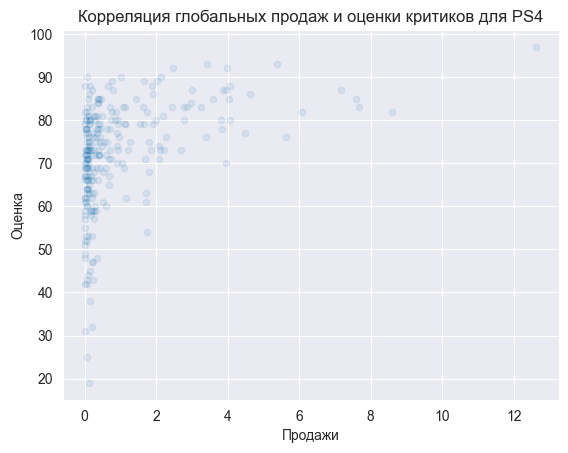

In [27]:
df.query('year_of_release >= 2012 and platform == "PS4"').plot(
    x='sales_total', y='critic_score', kind='scatter', alpha=0.1)

plt.title('Корреляция глобальных продаж и оценки критиков для PS4')
plt.xlabel('Продажи')
plt.ylabel('Оценка')
plt.show()

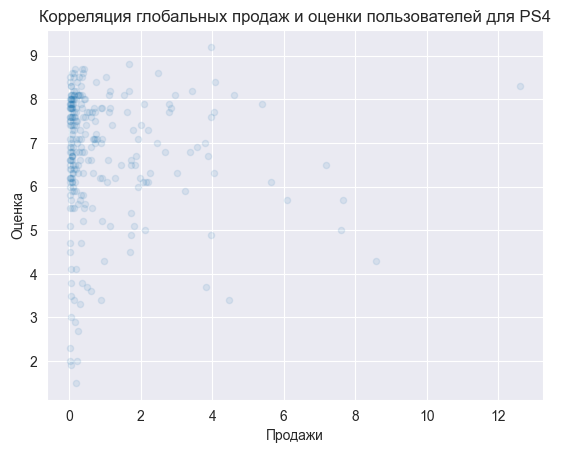

In [28]:
df.query('year_of_release >= 2012 and platform == "PS4"').plot(
    x='sales_total', y='user_score', kind='scatter', alpha=0.1)

plt.title('Корреляция глобальных продаж и оценки пользователей для PS4')
plt.xlabel('Продажи')
plt.ylabel('Оценка')
plt.show()

In [29]:
df.loc[df['platform'] == "PS4", 'sales_total'].corr(
    df.loc[df['platform'] == "PS4", 'critic_score'])

0.4065679010283494

* Корреляция продаж на PS4 с обзорами критиков присутствует, но не ярко выражена

In [30]:
df.loc[df['platform'] == "PS4", 'sales_total'].corr(
    df.loc[df['platform'] == "PS4", 'user_score'])

-0.031957105603966966

* Корреляция продаж с оценками пользователей отсутвует

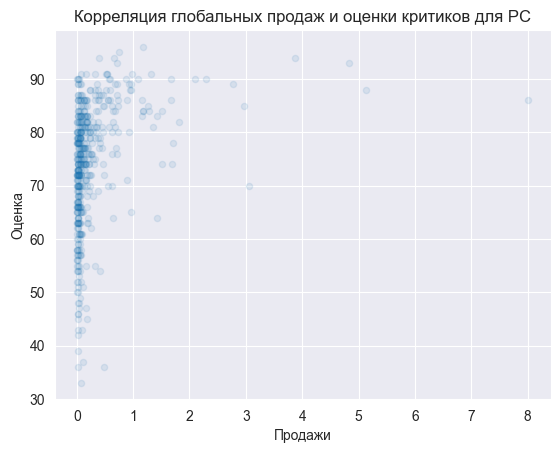

In [31]:
df.query('year_of_release >= 2008 and platform == "PC"').plot(
    x='sales_total', y='critic_score', kind='scatter', alpha=0.1)

plt.title('Корреляция глобальных продаж и оценки критиков для PC')
plt.xlabel('Продажи')
plt.ylabel('Оценка')
plt.show()

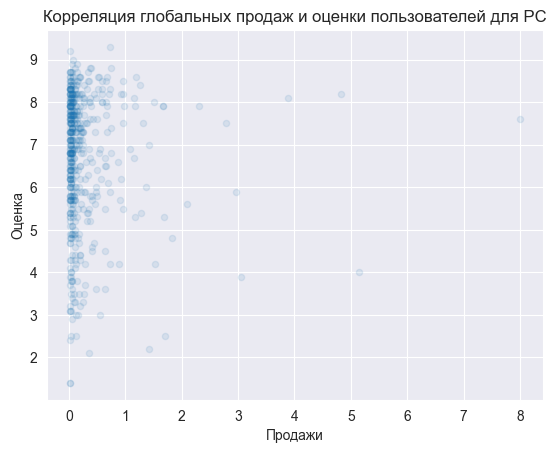

In [32]:
df.query('year_of_release >= 2008 and platform == "PC"').plot(
    x='sales_total', y='user_score', kind='scatter', alpha=0.1)

plt.title('Корреляция глобальных продаж и оценки пользователей для PC')
plt.xlabel('Продажи')
plt.ylabel('Оценка')
plt.show()

In [33]:
df.loc[df['platform'] == "PC", 'sales_total'].corr(
    df.loc[df['platform'] == "PC", 'critic_score'])

0.2573947154257763

* Корреляция продаж на PC с обзорами критиков выражена слабо

In [34]:
df.loc[df['platform'] == "PC", 'sales_total'].corr(
    df.loc[df['platform'] == "PC", 'user_score'])

0.012904743248086128

* Корреляция продаж на PC с оценками пользователей выражена очень слабо, практически отсутсвует

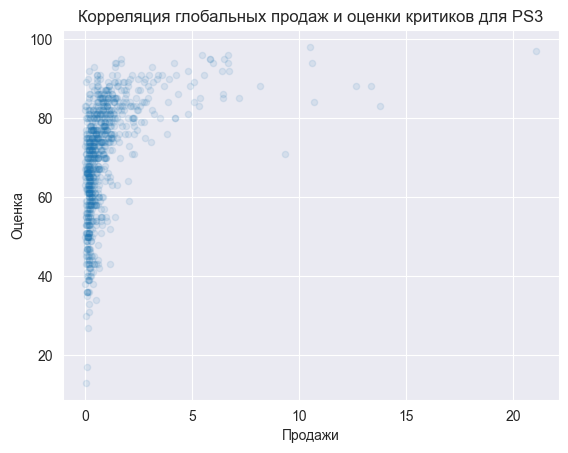

In [35]:
df.query('platform == "PS3"').plot(
    x='sales_total', y='critic_score', kind='scatter', alpha=0.1)

plt.title('Корреляция глобальных продаж и оценки критиков для PS3')
plt.xlabel('Продажи')
plt.ylabel('Оценка')
plt.show()

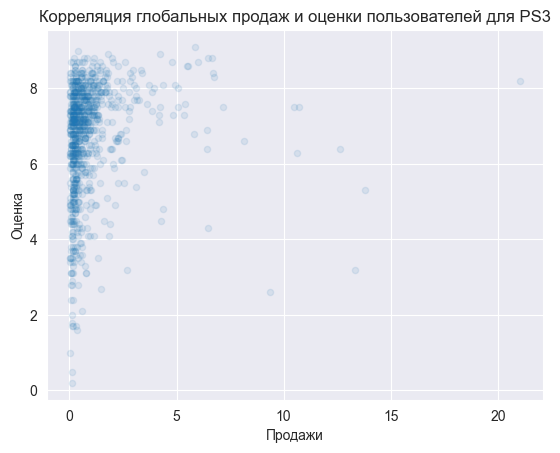

In [36]:
df.query('platform == "PS3"').plot(
    x='sales_total', y='user_score', kind='scatter', alpha=0.1)

plt.title('Корреляция глобальных продаж и оценки пользователей для PS3')
plt.xlabel('Продажи')
plt.ylabel('Оценка')
plt.show()

In [37]:
df.loc[df['platform'] == "PS3", 'sales_total'].corr(
    df.loc[df['platform'] == "PS3", 'critic_score'])

0.432758963966179

* Корреляция продаж на PS3 с обзорами критиков выражена слабо

In [38]:
df.loc[df['platform'] == "PS3", 'sales_total'].corr(
    df.loc[df['platform'] == "PS3", 'user_score'])

0.12841563836943584

* Корреляция продаж на PS3 с оценками пользователей выражена очень слабо, практически отсутсвует

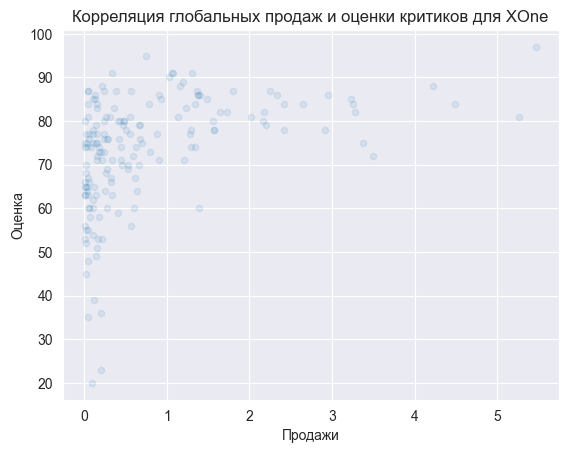

In [39]:
df.query('platform == "XOne"').plot(
    x='sales_total', y='critic_score', kind='scatter', alpha=0.1)

plt.title('Корреляция глобальных продаж и оценки критиков для XOne')
plt.xlabel('Продажи')
plt.ylabel('Оценка')
plt.show()

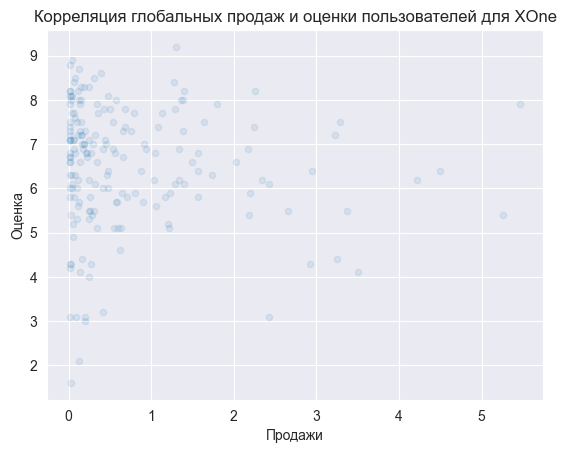

In [40]:
df.query('platform == "XOne"').plot(
    x='sales_total', y='user_score', kind='scatter', alpha=0.1)

plt.title('Корреляция глобальных продаж и оценки пользователей для XOne')
plt.xlabel('Продажи')
plt.ylabel('Оценка')
plt.show()

In [41]:
df.loc[df['platform'] == "XOne", 'sales_total'].corr(
    df.loc[df['platform'] == "XOne", 'critic_score'])

0.41699832684400107

* Корреляция продаж на XOne с обзорами критиков выражена слабо

In [42]:
df.loc[df['platform'] == "XOne", 'sales_total'].corr(
    df.loc[df['platform'] == "XOne", 'user_score'])

-0.06892505829722287

* Очень слабо выражена орицательная корреляция


## <a id="title4">Подведем некоторые промежуточные итоги корреляции</a>

* На исследованных платформах (PlayStation 3,4, Персональный компьютер и Xbox One) корреляция продаж с отзывами критиков определяется, но является
слабовыраженной (коэффициент Пирсона ~ 0.4)
* Корреляция с отзывами пользователей либо отсутствует, либо является очень слабо отрицательной

In [43]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,RP,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,RP,31.380001
5,Tetris,GB,1989,Puzzle,23.200001,2.260000,4.22,0.58,NaN,NaN,RP,30.260000
6,New Super Mario Bros.,DS,2006,Platform,11.280000,9.140000,6.50,2.88,89.0,8.5,E,29.799999
7,Wii Play,Wii,2006,Misc,13.960000,9.180000,2.93,2.84,58.0,6.6,E,28.910000
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.440000,6.940000,4.70,2.24,87.0,8.4,E,28.319998
9,Duck Hunt,NES,1984,Shooter,26.930000,0.630000,0.28,0.47,NaN,NaN,RP,28.309999



## <a id="title5">Построим распределение продаж по жанрам</a>

<font color="#fa8e47" size=3>
Пятерку самых прибыльных жанров по общим продажам можно определить в порядке убывания: Action, Shooter, Sports, Role-Playing, Misc

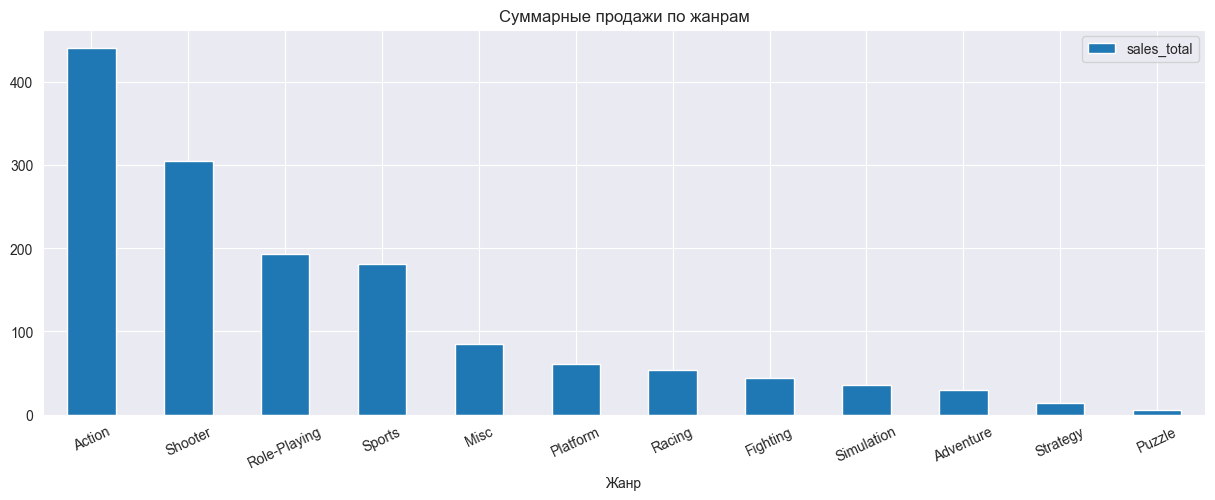

In [44]:
(df.query('year_of_release >= 2012').pivot_table(
    index='genre', values='sales_total', aggfunc= 'sum')
    .sort_values(by = 'sales_total', ascending = False)
    .plot(kind='bar', figsize=(15, 5), rot = 25))

plt.title('Суммарные продажи по жанрам')
plt.xlabel('Жанр')
plt.show()

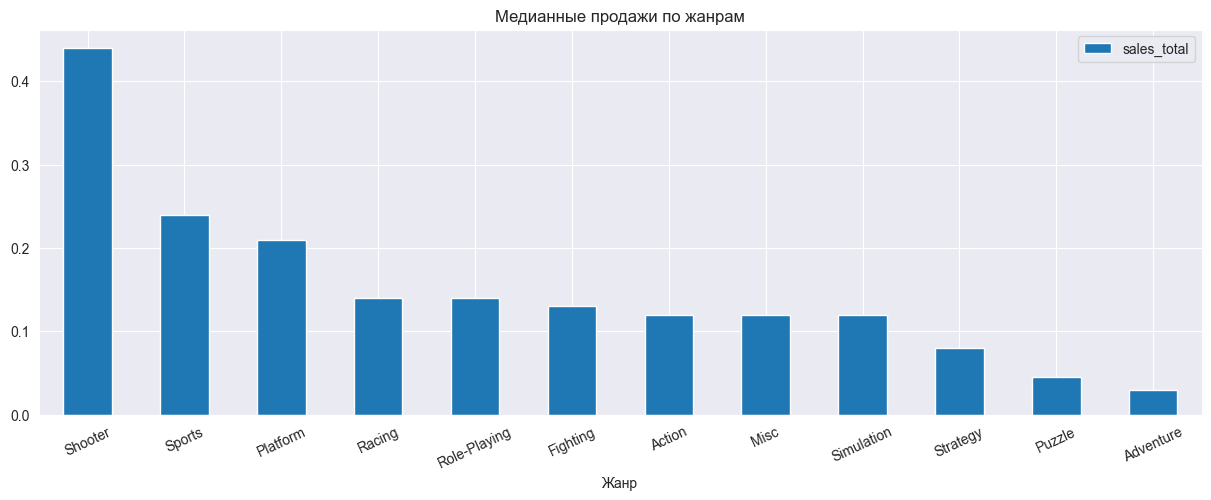

In [45]:

(df.query('year_of_release >= 2012').pivot_table(
    index='genre', values='sales_total', aggfunc= 'median')
    .sort_values(by = 'sales_total', ascending = False)
    .plot(kind='bar', figsize=(15, 5), rot = 25))

plt.title('Медианные продажи по жанрам')
plt.xlabel('Жанр')
plt.show()

## <a id="title6">Составим портрет пользователя каждого региона</a>

In [46]:
df.query('year_of_release >= 2012').pivot_table(
    index='platform', values='na_sales', aggfunc=np.sum).sort_values(
    by='na_sales',ascending=False).head(5)

,na_sales
platform,
X360,140.050003
PS4,108.739998
PS3,103.379997
XOne,93.120003
3DS,55.310001


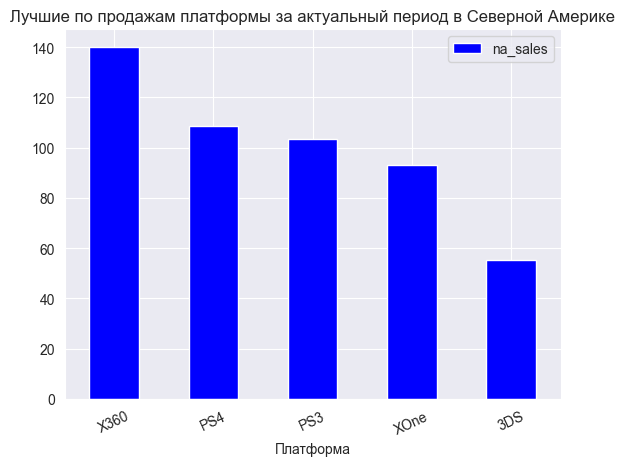

In [47]:
df.query('year_of_release >= 2012').pivot_table(
    index='platform',values='na_sales',aggfunc=np.sum).sort_values(
    by='na_sales',ascending=False).head(5).plot(kind='bar', color='blue', rot=25)

plt.title('Лучшие по продажам платформы за актуальный период в Северной Америке')
plt.xlabel('Платформа')
plt.show()

In [48]:
df.query('year_of_release >= 2012').pivot_table(
    index='platform', values='eu_sales', aggfunc=np.sum).sort_values(
    by='eu_sales',ascending=False).head(5)

,eu_sales
platform,
PS4,141.089996
PS3,106.860001
X360,74.519997
XOne,51.590000
3DS,42.639999


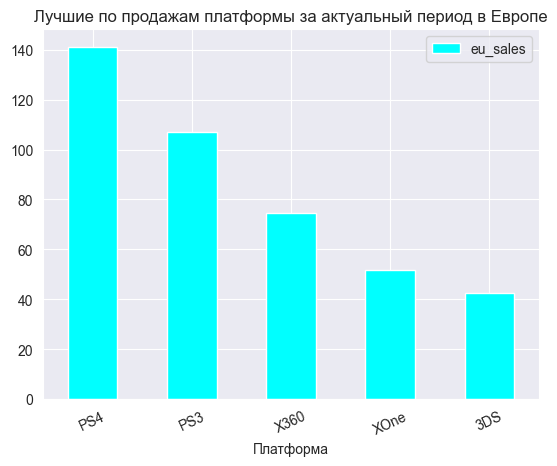

In [49]:
df.query('year_of_release >= 2012').pivot_table(
    index='platform', values='eu_sales', aggfunc=np.sum).sort_values(
    by='eu_sales',ascending=False).head(5).plot(kind='bar', color='cyan', rot=25)

plt.title('Лучшие по продажам платформы за актуальный период в Европе')
plt.xlabel('Платформа')
plt.show()

In [50]:
df.query('year_of_release >= 2012').pivot_table(
    index='platform', values='jp_sales', aggfunc=np.sum).sort_values(
    by='jp_sales',ascending=False).head(5)

,jp_sales
platform,
3DS,87.790001
PS3,35.290001
PSV,21.039999
PS4,15.960000
WiiU,13.010000


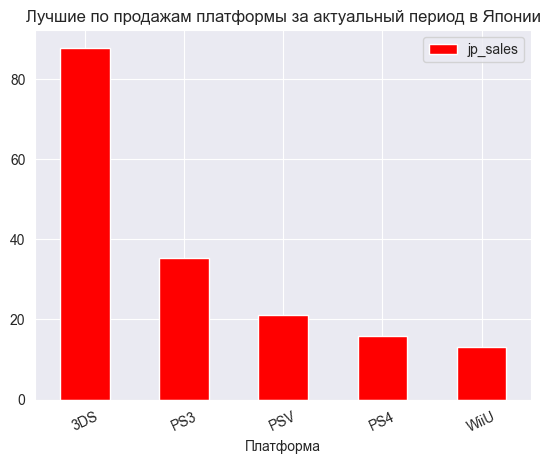

In [51]:
df.query('year_of_release >= 2012').pivot_table(
    index='platform', values='jp_sales', aggfunc=np.sum).sort_values(
    by='jp_sales',ascending=False).head(5).plot(kind='bar', color='red', rot=25)

plt.title('Лучшие по продажам платформы за актуальный период в Японии')
plt.xlabel('Платформа')
plt.show()

* По срезу данных релизов с 2012 по 2016 год можно сказать в США лидирует X360 на втором месте PS4, на третьем PS3
* В Евросоюзе лидирует PS4, на втором месте PS3, на третьем X360
* Платформа XOne на 4ом месте и США и Евросоюзе
* В Японии ситуация отличается кардинально: на первом месте 3DS, на втором PS3, на третьем PSV, PS4 на четвертом, на пятом WiiU. X360 и XOne не очень популярны в Японии.
* Можно отметить, что в Японии первое место занимает портативная консоль и три из пяти лидеров портативные

In [52]:
df.query('year_of_release >= 2012').pivot_table(
    index='genre', values='na_sales', aggfunc=np.sum).sort_values(
    by='na_sales',ascending=False).head(5)

,na_sales
genre,
Action,177.839996
Shooter,144.770004
Sports,81.529999
Role-Playing,64.000000
Misc,38.189999


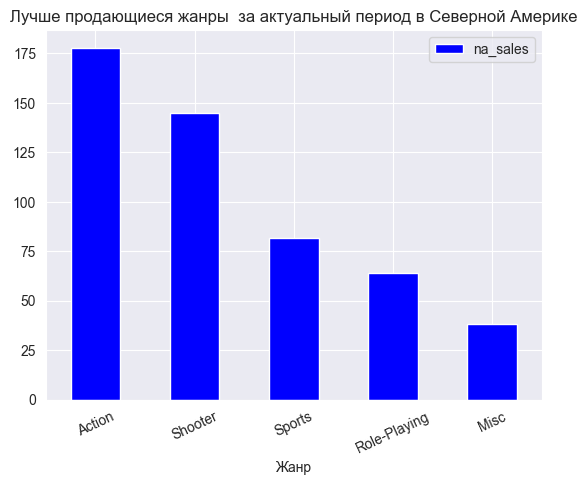

In [53]:
df.query('year_of_release >= 2012').pivot_table(
    index='genre', values='na_sales', aggfunc=np.sum).sort_values(
    by='na_sales',ascending=False).head(5).plot(kind='bar', color='blue', rot=25)

plt.title('Лучше продающиеся жанры  за актуальный период в Северной Америке')
plt.xlabel('Жанр')
plt.show()

In [54]:
df.query('year_of_release >= 2012').pivot_table(
    index='genre', values='eu_sales', aggfunc=np.sum).sort_values(
    by='eu_sales',ascending=False).head(5)

,eu_sales
genre,
Action,159.339996
Shooter,113.470001
Sports,69.089996
Role-Playing,48.529999
Racing,27.290001


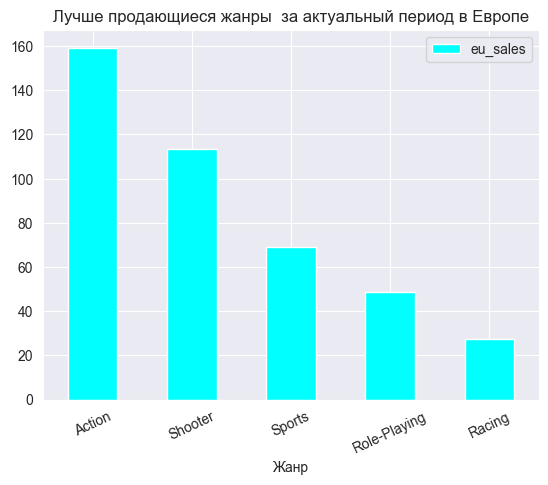

In [55]:
df.query('year_of_release >= 2012').pivot_table(
    index='genre', values='eu_sales', aggfunc=np.sum).sort_values(
    by='eu_sales',ascending=False).head(5).plot(kind='bar', color='cyan', rot=25)

plt.title('Лучше продающиеся жанры  за актуальный период в Европе')
plt.xlabel('Жанр')
plt.show()

In [56]:
df.query('year_of_release >= 2012').pivot_table(
    index='genre', values='jp_sales', aggfunc=np.sum).sort_values(
    by='jp_sales',ascending=False).head(5)

,jp_sales
genre,
Role-Playing,65.440002
Action,52.799999
Misc,12.860000
Simulation,10.410000
Fighting,9.440000


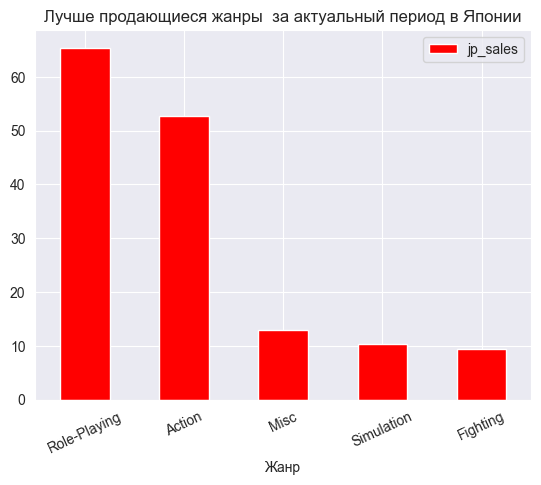

In [57]:
df.query('year_of_release >= 2012').pivot_table(
    index='genre', values='jp_sales', aggfunc=np.sum).sort_values(
    by='jp_sales',ascending=False).head(5).plot(kind='bar', color='red', rot=25)

plt.title('Лучше продающиеся жанры  за актуальный период в Японии')
plt.xlabel('Жанр')
plt.show()

* Продажи по жанрам в США и европе показывают практически идентичную картину На первом месте игры жанра Action, на втором Shooter,
на третьем спортивные игры, на четвертом ролевые, а вот пятое место в США занимают игры Других жанров, тогда как в Европе игры жанра Гоночных симуляторов
* В регионе Японии картина отличается разительно: на первом месте Ролевые игры, на втором Action, и дальше с большим отрывом идут игры жанров Misc, Simulation, Fighting

## <a id="title7">Продажи игр в зависимости от возрастного рейтинга</a>

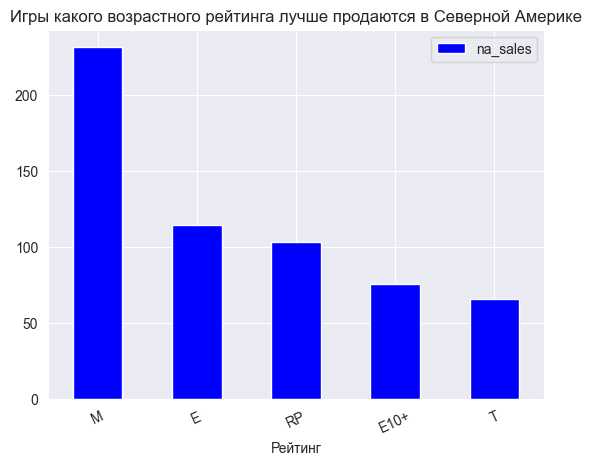

In [58]:
df.query('year_of_release >= 2012').pivot_table(
    index='rating', values='na_sales', aggfunc=np.sum).sort_values(
    by='na_sales',ascending=False).plot(kind='bar', color='blue', rot=25)

plt.title('Игры какого возрастного рейтинга лучше продаются в Северной Америке')
plt.xlabel('Рейтинг')
plt.show()

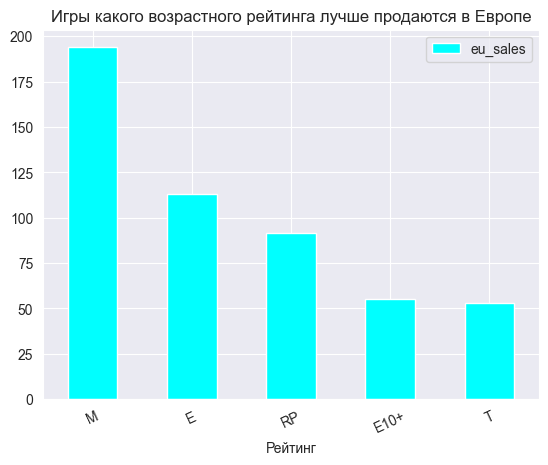

In [59]:
df.query('year_of_release >= 2012').pivot_table(
    index='rating', values='eu_sales', aggfunc=np.sum).sort_values(
    by='eu_sales',ascending=False).plot(kind='bar', color='cyan', rot=25)

plt.title('Игры какого возрастного рейтинга лучше продаются в Европе')
plt.xlabel('Рейтинг')
plt.show()

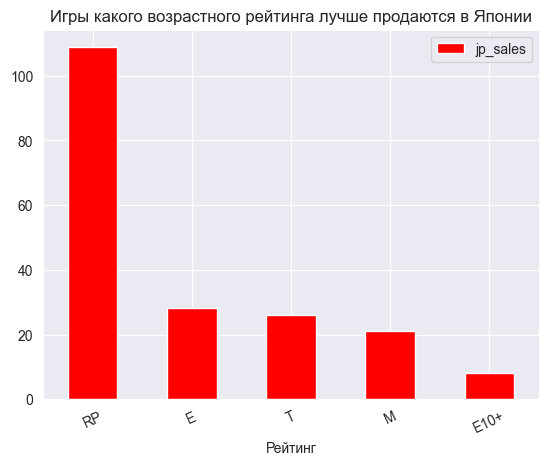

In [60]:
df.query('year_of_release >= 2012').pivot_table(
    index='rating', values='jp_sales', aggfunc=np.sum).sort_values(
    by='jp_sales',ascending=False).plot(kind='bar', color='red', rot=25)

plt.title('Игры какого возрастного рейтинга лучше продаются в Японии')
plt.xlabel('Рейтинг')
plt.show()

Исследовав распределение продаж по возрастным рейтингам можно отметить следующее:
*  В США и Европе картина практически идентичная на первом месте игры рейтинга "для взрослых", на втором месте игры "для всех", на третьем игры отсутствующим рейтингом,
на четвертом игры "для всех 10+", игры для подростков на пятом месте
* В Японии предпочтения отличаются. На первом месте с большим отрывом игры без рейтинга, скорее всего потому что рейтинг изначально придуман в США и для исконно
японских игр не применяется, на втором с разницей почти в пять раз "для всех", на третьем игры "для подростков", на четвертом игры "для взрослых" и на пятом игры "для всех 10+"

### <a id="title8">Проверка гипотез</a>

* Гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [61]:
users_score_xone = df.loc[(df['platform'] == "XOne") & (df['year_of_release'] >= 2012) & ~(df['user_score'].isna()), 'user_score']
users_score_pc = df.loc[(df['platform'] == "PC") & (df['year_of_release'] >= 2012) & ~(df['user_score'].isna()), 'user_score']

print(users_score_xone.mean())
print(users_score_pc.mean())

alpha = 0.05

results = st.ttest_ind(users_score_xone, users_score_pc)

print('P-value равно', results.pvalue)
if alpha > results.pvalue:
    print('Нулевая гипотеза опровергнута')
else:
    print('Нулевая гипотеза не опровергнута')

6.521428
6.428641
P-value равно 0.5535102819461236
Нулевая гипотеза не опровергнута


Поскольку мы исследуем две выборки с похожими данными была выдвинута гипотеза о равенстве средних двух генеральных совокупностей,
поэтому для проверки гипотезы был выбран тест Стьюдента

* Гипотеза H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
* Гипотеза H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [62]:
users_score_action = df.loc[(df['genre'] == "Action") & (df['year_of_release'] >= 2012) & ~(df['user_score'].isna()), 'user_score']
users_score_sports = df.loc[(df['genre'] == "Sports") & (df['year_of_release'] >= 2012) & ~(df['user_score'].isna()), 'user_score']

print(users_score_action.mean())
print(users_score_sports.mean())

alpha = 0.05

results1 = st.ttest_ind(users_score_action, users_score_sports, equal_var = False)

print('P-value равно', results1.pvalue)
if alpha > results1.pvalue:
    print('Нулевая гипотеза опровергнута')
else:
    print('Нулевая гипотеза не опровергнута')

6.825048
5.455897
P-value равно 4.2428992602295484e-20
Нулевая гипотеза опровергнута


Поскольку мы исследуем две выборки с похожими данными была выдвинута гипотеза о равенстве средних двух генеральных совокупностей,
поэтому для проверки гипотезы был выбран тест Стьюдента, параметр equal_var установлен в False т.к. выборки могут иметь разный размер

## <a id="title9">Общий вывод</a>

<h3>На основе проведённого анализа можно сделать следующие выводы:</h3>

* В глобальном плане и по объему продаж перспективными являются следующие платформы: это свежие и еще набирающие популярность
PlayStation 4, XOne, вечно молодой персональный компьютер, а также портативные PSV и ЗDS (последняя особенно популярна в Японии).
* Жанровые предпочтения на глобальном рынке выглядят так: лидирует жанры Action и Shooter,
затем идут и жанры Спорт и Ролевые игры, а также не вошедшие в эти категории.
* В жанровых предпочтениях по регионам есть различия. И если в Северной Америке и Европе они практически идентичны, то
в Японии отличаются кардинально. Пятерка жанром в Японии выглядит так: Ролевые игры, Action, Misc, Simulation, Fighting
* Также актуальные платформы лидируют и по количеству новых релизов это PS4 И.
* Что касается возрастного рейтинга можно сказать, что в Северной Америке и Европе популярны в основном игры для людей
старше 17 лет, на втором месте игры "для всех", на третьем без рейтинга. В Японии же лидируют игры без рейтинга, скорее всего потому что рейтинг изначально придуман в США и для исконно
японских игр не применяется, игры с остальными рейтингами отстают почти в пять раз, игры 17+ занимают лишь четвертую строчку, на втором и третьем местах игры
"для всех" и игры "для подростков"

На основе всего выше описанного можно порекомендовать для составления планов на 2017 год, обратить основное внимание, для
Европейского и Североамериканского рынка, на консоли PS4 и XOne, а также на игры для персоналок в жанрах Action, Shooter, Sport,
Racing и Ролевые игры, предназначенные, как для людей 17+, так и для всех(очевидно это ни одни и те же игры).
Отдельно для Японского рынка стоит обратить внимание на игры для портативных консолей, в основном игры без рейтинга ориентированные на японскую аудиторию.
Жанры популярные в Японии это Ролевые игры, Action, a также MISC, Simulation и Fighting